# Diagnosing the quality of the posterior generated from training SBI
This notebook demonstrates the approach for running this code in the case of SBI being run from the static pre-generated data.

In [1]:
import sbi
import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# remove top and right axis from plots
matplotlib.rcParams["axes.spines.right"] = False
matplotlib.rcParams["axes.spines.top"] = False

In [2]:
from scripts import evaluate, io, plot

In [3]:
modelloader = io.ModelLoader()
path = "../savedmodels/sbi/"
model_name = "sbi_linear_from_data"
posterior = modelloader.load_model_pkl(path, model_name)

../savedmodels/sbi/


Also load up the validation dataset. 

In [4]:
dataloader = io.DataLoader()
path = "../saveddata/"
data_name = "data_validation"
validation = dataloader.load_data_h5(data_name, path)

Define the validation set.

In [5]:
# the length of the validation is the number of posterior
# samples you're using in SBC
# here I choose 1000 to match the number used in the
# generative tutorial
len_validation = 1_000
ys = validation['xs'][0:len_validation]
thetas = validation['thetas'][0:len_validation]
print(np.shape(thetas))

torch.Size([1000, 2])


Draw one instance from this.

In [6]:
print(np.shape(validation['xs'][0]))
theta_true = validation['thetas'][0]
y_true = validation['xs'][0]

torch.Size([101])


Drawing 10000 posterior samples:   0%|          | 0/10000 [00:00<?, ?it/s]

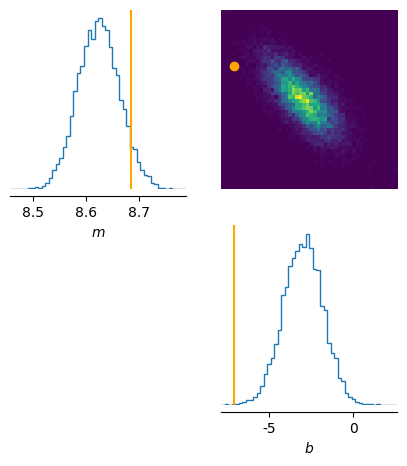

In [7]:
# sample from the posterior
posterior_samples_1 = posterior.sample((10000,), x = y_true)
display = plot.Display()
display.mackelab_corner_plot(posterior_samples_1,
                             labels_list = ['$m$','$b$'],
                             truth_list = theta_true,
                             truth_color = 'orange',
                             plot = True,
                             save = True,
                             path = '../plots/static/')

# Evaluate posterior by running all-in-one helper function
`run_all_sbc`

In [8]:
diagnose_model = evaluate.Diagnose_static()

In [9]:
low_bounds = torch.tensor([0, -10])
high_bounds = torch.tensor([10, 10])

prior = sbi.utils.BoxUniform(low = low_bounds, high = high_bounds)

Running 1000 sbc samples.:   0%|          | 0/1000 [00:00<?, ?it/s]

{'ks_pvals': tensor([1.9046e-21, 2.5203e-01]), 'c2st_ranks': tensor([0.6000, 0.5950]), 'c2st_dap': tensor([0.4730, 0.5020])}


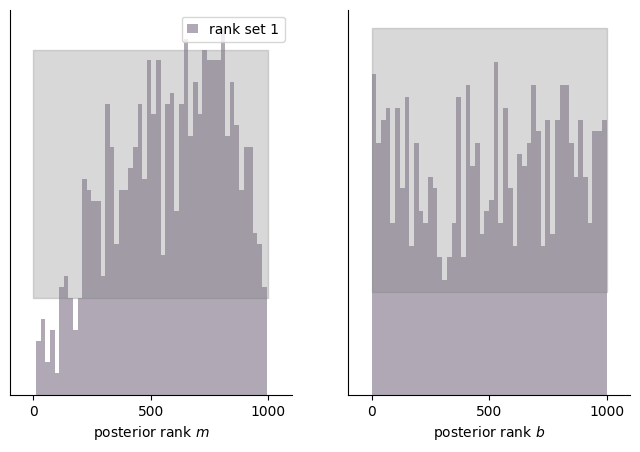

Help on function sbc_rank_plot in module sbi.analysis.plot:

sbc_rank_plot(ranks: Union[torch.Tensor, numpy.ndarray, List[torch.Tensor], List[numpy.ndarray]], num_posterior_samples: int, num_bins: Optional[int] = None, plot_type: str = 'cdf', parameter_labels: Optional[List[str]] = None, ranks_labels: Optional[List[str]] = None, colors: Optional[List[str]] = None, fig: Optional[matplotlib.figure.Figure] = None, ax: Optional[matplotlib.axes._axes.Axes] = None, figsize: Optional[tuple] = None, kwargs: Dict = {}) -> Tuple[matplotlib.figure.Figure, matplotlib.axes._axes.Axes]
    Plot simulation-based calibration ranks as empirical CDFs or histograms.
    
    Additional options can be passed via the kwargs argument, see _sbc_rank_plot.
    
    Args:
        ranks: Tensor of ranks to be plotted shape (num_sbc_runs, num_parameters), or
            list of Tensors when comparing several sets of ranks, e.g., set of ranks
            obtained from different methods.
        num_bins: number o

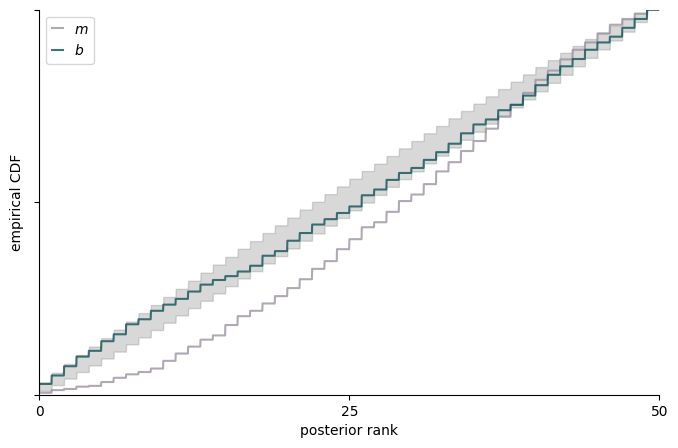

Sampling from the posterior for each obs: 100%|█| 1000/1000 [00:12<00:00, 80.06o


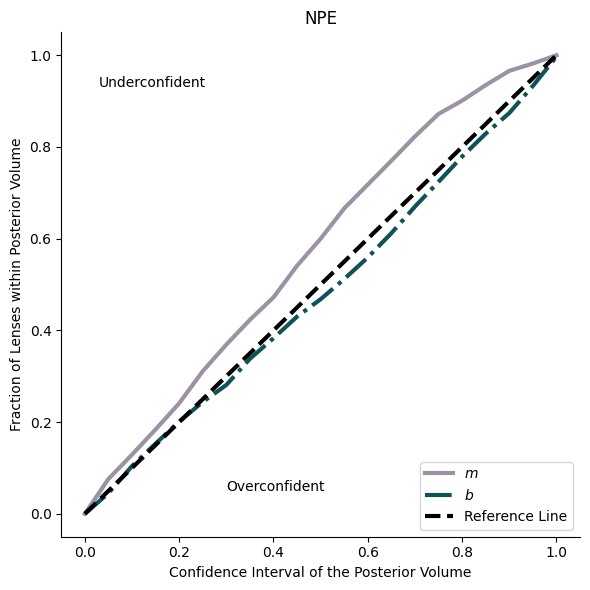

In [10]:
labels_list = ['$m$','$b$']
colorlist = ['#9C92A3','#0F5257']
diagnose_model.run_all_sbc(
                    prior,
                    posterior,
                    thetas,
                    ys,
                    labels_list,
                    colorlist,
                    num_posterior_samples=1_000,
                    samples_per_inference=1_000,
                    plot=True,
                    save=False,
                    )

# Save to disk

Running 1000 sbc samples.:   0%|          | 0/1000 [00:00<?, ?it/s]

{'ks_pvals': tensor([1.9046e-21, 1.6848e-01]), 'c2st_ranks': tensor([0.5915, 0.5820]), 'c2st_dap': tensor([0.4785, 0.4885])}
Help on function sbc_rank_plot in module sbi.analysis.plot:

sbc_rank_plot(ranks: Union[torch.Tensor, numpy.ndarray, List[torch.Tensor], List[numpy.ndarray]], num_posterior_samples: int, num_bins: Optional[int] = None, plot_type: str = 'cdf', parameter_labels: Optional[List[str]] = None, ranks_labels: Optional[List[str]] = None, colors: Optional[List[str]] = None, fig: Optional[matplotlib.figure.Figure] = None, ax: Optional[matplotlib.axes._axes.Axes] = None, figsize: Optional[tuple] = None, kwargs: Dict = {}) -> Tuple[matplotlib.figure.Figure, matplotlib.axes._axes.Axes]
    Plot simulation-based calibration ranks as empirical CDFs or histograms.
    
    Additional options can be passed via the kwargs argument, see _sbc_rank_plot.
    
    Args:
        ranks: Tensor of ranks to be plotted shape (num_sbc_runs, num_parameters), or
            list of Tensors whe

Sampling from the posterior for each obs: 100%|█| 1000/1000 [00:12<00:00, 80.75o


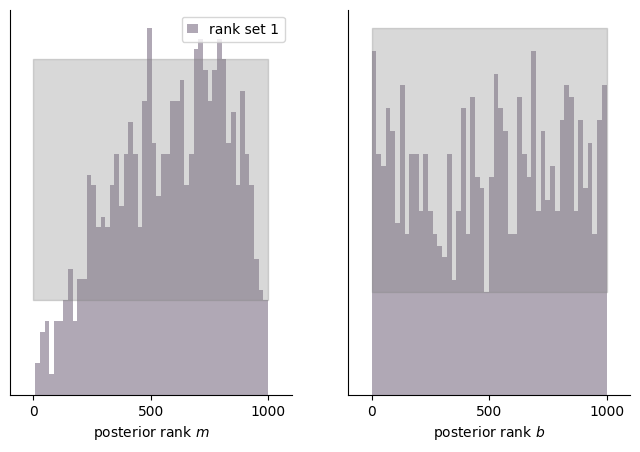

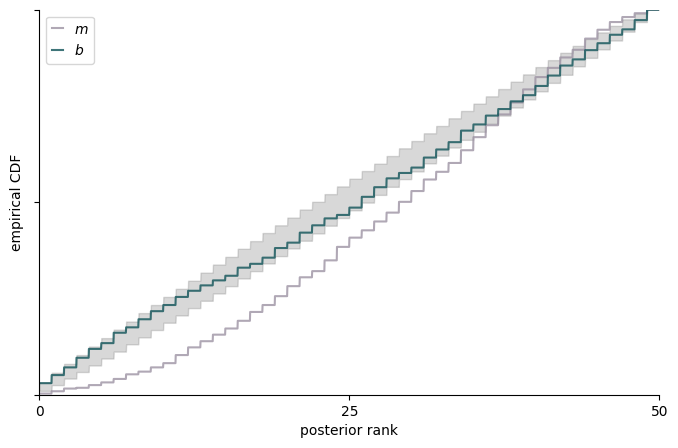

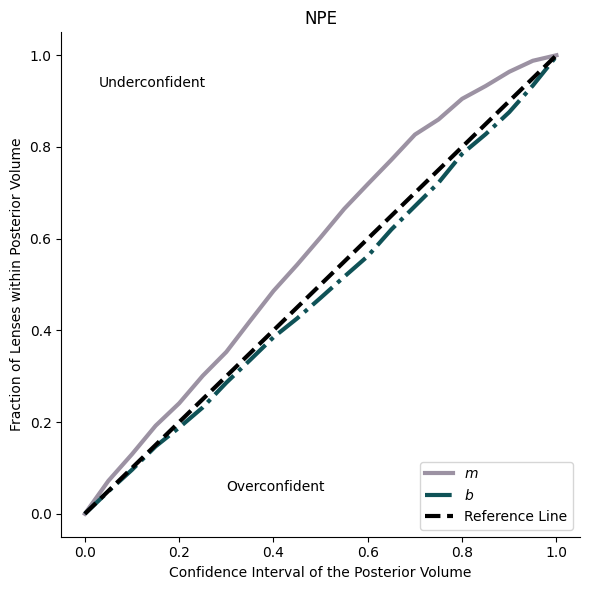

In [11]:
labels_list = ['$m$','$b$']
colorlist = ['#9C92A3','#0F5257']
diagnose_model.run_all_sbc(prior,
                    posterior,
                    thetas,
                    ys,
                    labels_list,
                    colorlist,
                    num_posterior_samples=1_000,
                    samples_per_inference=1_000,
                    plot=False,
                    save=True,
                    path='../plots/static/'
                    )

# Evaluate posterior by running individual pieces
Let's say you just want to get the statistics from the rank plots and print them under the rank plots.


In [12]:
diagnose_model = evaluate.Diagnose_static()

Running 1000 sbc samples.:   0%|          | 0/1000 [00:00<?, ?it/s]

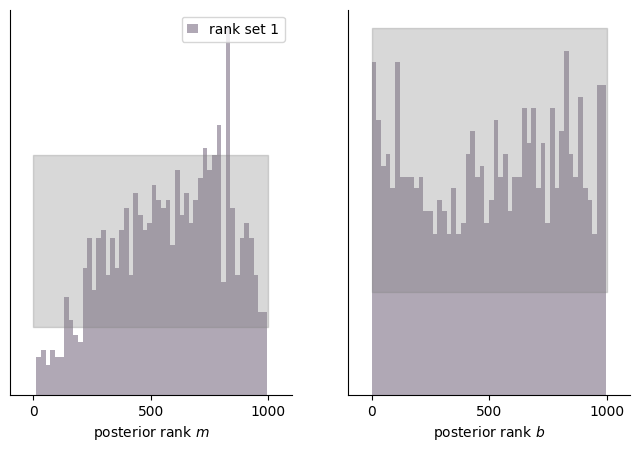

In [13]:
num_posterior_samples = 1_000
thetas, ys, ranks, dap_samples = diagnose_model.generate_sbc_samples(posterior,
                                                                     thetas,
                                                                     ys,
                                                                     num_posterior_samples)

diagnose_model.plot_1d_ranks(ranks,
              num_posterior_samples,
              labels_list,
              colorlist,
              plot=True,
              save=False)

In [14]:
stats = diagnose_model.sbc_statistics(ranks,
                            thetas,
                            dap_samples,
                            num_posterior_samples)
print(stats)

{'ks_pvals': tensor([2.2656e-20, 1.6848e-01]), 'c2st_ranks': tensor([0.6015, 0.5760]), 'c2st_dap': tensor([0.4655, 0.4800])}
